# Importy

In [1]:
import numpy as np

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
import matplotlib.pyplot as plt

# Funkcje

In [4]:
def fun(x):
    return 1/(1+np.exp(-x))

In [5]:
def prob(a,b):
    result = fun(a-b)
    print("Prawdopodobieństwo:",result)

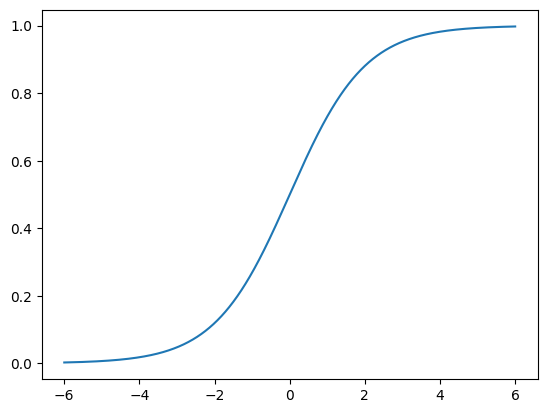

In [6]:
x = np.arange(-6,6.000001,0.001)
y=1/(1+np.exp(-x))
plt.plot(x,y)
plt.show()

In [7]:
interact( prob , a=widgets.FloatSlider(min=-3,max=3,value=0,step=0.01,description ="Zawodnik:"),
         b = widgets.FloatSlider(min=-3,max=3,value=0,step=0.01,description='Pytanie:') )

interactive(children=(FloatSlider(value=0.0, description='Zawodnik:', max=3.0, min=-3.0, step=0.01), FloatSlid…

<function __main__.prob(a, b)>

In [8]:
content = open("sredni.txt","r")

In [9]:
raw_format = content.read()
lines = raw_format.split("\n")

In [10]:
lst= list()
for line in lines:
    if len(line) < 10 : continue
    tmp = [ int(x) for x in list(line) ]
    lst.append(tmp)
M = np.matrix(lst[:100])

In [11]:
pyt_ok = np.sum(M,axis=0)
pyt_ok = pyt_ok.ravel()
pyt_ok = pyt_ok.reshape( pyt_ok.shape[-1],pyt_ok.shape[0] )
pyt_ok = np.array([ int(x) for x in pyt_ok ])
pyt_ok 

array([20, 64, 83, ..., 17, 88, 67])

In [12]:
player = np.sum(M,axis=1)
player = np.array([ int(x) for x in player ])
player

array([3685, 5747, 5660, 4415, 6205, 3379, 5525, 3145, 8615, 8751, 1414,
       4181, 7462, 3417, 1738, 7452, 1903, 1227, 7811, 5181, 1514, 3636,
       5897, 7261, 3475, 8521, 8458, 4287, 7381, 3925, 4175, 3772, 1855,
       2446, 6939, 8711, 3216, 8193, 7916, 2374, 8142, 4617, 7672, 6609,
       1464, 6909, 4677, 2198, 5643, 4690, 8652, 4888, 1529, 8154, 4142,
       2942, 5173, 7786, 6420, 3545, 7960, 8145, 8748, 6275, 4588, 5516,
       7781, 5488, 5773, 8418, 2383, 3780, 8065, 8046, 3576, 7042, 7787,
       7508, 7318, 2023, 4027, 8609, 7947, 4651, 3186, 8147, 2529, 2910,
       7244, 8464, 8294, 5654, 2813, 2476, 6873, 1151, 8337, 7853, 4456,
       7372])

In [13]:
np.sum( player>5000 ), player>5000

(55,
 array([False,  True,  True, False,  True, False,  True, False,  True,
         True, False, False,  True, False, False,  True, False, False,
         True,  True, False, False,  True,  True, False,  True,  True,
        False,  True, False, False, False, False, False,  True,  True,
        False,  True,  True, False,  True, False,  True,  True, False,
         True, False, False,  True, False,  True, False, False,  True,
        False, False,  True,  True,  True, False,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True, False, False,
         True,  True, False,  True,  True,  True,  True, False, False,
         True,  True, False, False,  True, False, False,  True,  True,
         True,  True, False, False,  True, False,  True,  True, False,
         True]))

In [14]:
player>5000

array([False,  True,  True, False,  True, False,  True, False,  True,
        True, False, False,  True, False, False,  True, False, False,
        True,  True, False, False,  True,  True, False,  True,  True,
       False,  True, False, False, False, False, False,  True,  True,
       False,  True,  True, False,  True, False,  True,  True, False,
        True, False, False,  True, False,  True, False, False,  True,
       False, False,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
        True,  True, False,  True,  True,  True,  True, False, False,
        True,  True, False, False,  True, False, False,  True,  True,
        True,  True, False, False,  True, False,  True,  True, False,
        True])

In [15]:
indeks = np.arange(1,101)[player>5000]

In [16]:
list( np.arange(1,101)[player>5000] ).index(54)

25

In [17]:
tmp = M[ player>5000 ,  :]
PM = M[ player>5000 ,  :]
ALL = PM[:, (pyt_ok>75)  | (pyt_ok<25)  ]
ALL.shape,PM.shape

((55, 4114), (55, 10000))

# Proste pytania & podejrzani gracze

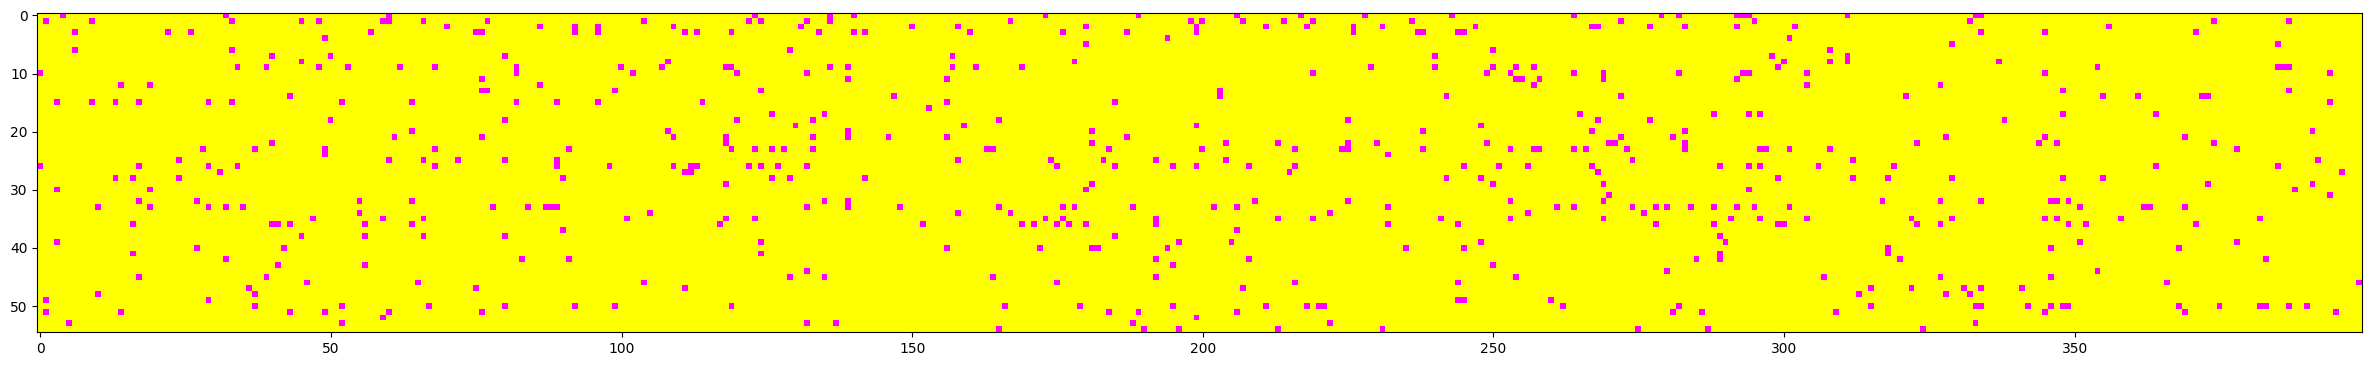

(None, 2672)

In [18]:
tmp = PM[:,(pyt_ok>75) ]
proste = PM[:,(pyt_ok>75) ]
tmp = tmp[:,:400]
plt.figure(figsize=(30,5))
plt.imshow( tmp  , cmap="spring")
plt.show(),PM[:,(pyt_ok>75) ].shape[1]

# Trudne pytania 

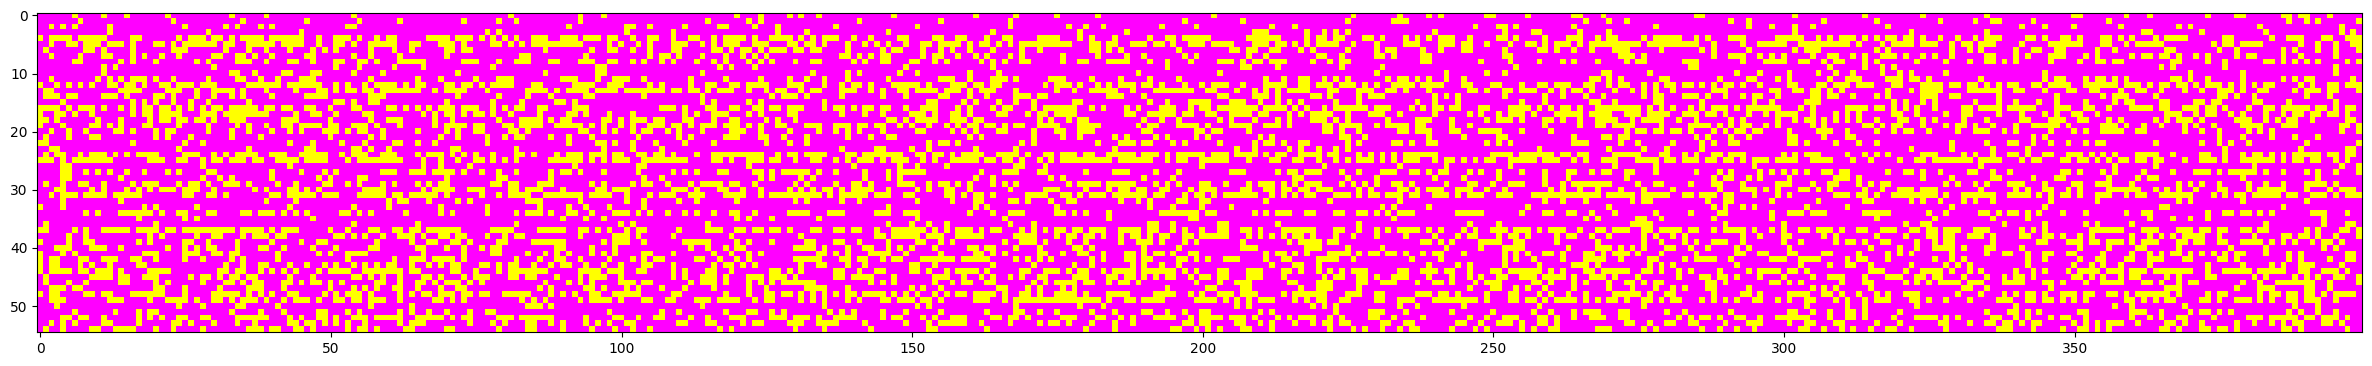

(None, 1442)

In [19]:
tmp = PM[:,(pyt_ok<25) ]
trudne = PM[:,(pyt_ok<25) ]
tmp = tmp[:,:400]
plt.figure(figsize=(30,5))
plt.imshow( tmp , cmap="spring")
plt.show(),PM[:,(pyt_ok<25) ].shape[1]

#### pierwszy krok do funkcji kosztu

In [20]:
coef = ( 100 - pyt_ok )[pyt_ok<25]
coef.shape

(1442,)

In [21]:
cost = trudne
cost.shape,trudne.shape

((55, 1442), (55, 1442))

In [22]:
for i in range(cost.shape[0]):
    cost[i,:] = np.array(cost[i,:])* np.array(coef)

In [23]:
cost[:10,:10]

matrix([[ 0,  0,  0,  0,  0,  0, 85,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0, 84,  0,  0],
        [ 0,  0, 81,  0, 77,  0, 85,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [80,  0, 81, 79, 77, 83,  0, 84, 79, 81],
        [ 0,  0, 81,  0,  0, 83, 85,  0, 79, 81],
        [ 0, 85,  0,  0,  0,  0,  0,  0, 79, 81],
        [ 0,  0, 81,  0,  0,  0,  0, 84,  0,  0],
        [ 0,  0,  0,  0,  0,  0, 85, 84,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [24]:
sus = np.sum(cost,axis=-1)

In [25]:
indeks[ sus.argmax() ]

54

In [26]:
trudne[:10,:10]

matrix([[ 0,  0,  0,  0,  0,  0, 85,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0, 84,  0,  0],
        [ 0,  0, 81,  0, 77,  0, 85,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [80,  0, 81, 79, 77, 83,  0, 84, 79, 81],
        [ 0,  0, 81,  0,  0, 83, 85,  0, 79, 81],
        [ 0, 85,  0,  0,  0,  0,  0,  0, 79, 81],
        [ 0,  0, 81,  0,  0,  0,  0, 84,  0,  0],
        [ 0,  0,  0,  0,  0,  0, 85, 84,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

# PipeLine

In [27]:
content = open("sredni.txt","r")
raw_format = content.read()
lines = raw_format.split("\n")

In [28]:
#sredni_odpowiedzi.txt
content2 = open("sredni_odpowiedzi.txt","r")
raw_format2 = content2.read()
lines2 = raw_format2.split("\n")

In [29]:
lines2

['Case #1: 54',
 'Case #2: 38',
 'Case #3: 34',
 'Case #4: 36',
 'Case #5: 51',
 'Case #6: 57',
 'Case #7: 28',
 'Case #8: 84',
 'Case #9: 32',
 'Case #10: 7',
 'Case #11: 16',
 'Case #12: 53',
 'Case #13: 25',
 'Case #14: 32',
 'Case #15: 94',
 'Case #16: 20',
 'Case #17: 7',
 'Case #18: 84',
 'Case #19: 64',
 'Case #20: 40',
 'Case #21: 81',
 'Case #22: 26',
 'Case #23: 51',
 'Case #24: 75',
 'Case #25: 83',
 'Case #26: 46',
 'Case #27: 94',
 'Case #28: 37',
 'Case #29: 79',
 'Case #30: 10',
 'Case #31: 92',
 'Case #32: 90',
 'Case #33: 76',
 'Case #34: 98',
 'Case #35: 72',
 'Case #36: 19',
 'Case #37: 92',
 'Case #38: 11',
 'Case #39: 100',
 'Case #40: 10',
 'Case #41: 72',
 'Case #42: 21',
 'Case #43: 1',
 'Case #44: 3',
 'Case #45: 77',
 'Case #46: 17',
 'Case #47: 54',
 'Case #48: 29',
 'Case #49: 41',
 'Case #50: 98',
 '']

In [30]:
from tqdm import tqdm

In [31]:
for i in tqdm(range(int(lines[0]))):
    lst= list()
    for line in lines:
        if len(line) < 10 : continue
        tmp = [ int(x) for x in list(line) ]
        lst.append(tmp)
    M = np.matrix(lst[100*i:100+100*i])
    
    pyt_ok = np.sum(M,axis=0)
    pyt_ok = pyt_ok.ravel()
    pyt_ok = pyt_ok.reshape( pyt_ok.shape[-1],pyt_ok.shape[0] )
    pyt_ok = np.array([ int(x) for x in pyt_ok ])
    
    player = np.sum(M,axis=1)
    player = np.array([ int(x) for x in player ])
    
    indeks = np.arange(1,101)[player>5000]
    
    tmp = M[ player>5000 ,  :]
    PM = M[ player>5000 ,  :]
    
    trudne = PM[:,(pyt_ok<25) ]
    cost = trudne
    
    coef = ( 100 - pyt_ok )[pyt_ok<25]
    for j in range(cost.shape[0]):
        cost[j,:] = np.array(cost[j,:])* np.array(coef)
        
    sus = np.sum(cost,axis=-1)
    #print(i)
    if indeks[ sus.argmax() ] == int( lines2[i].split(" ")[-1] ) :
        print("OK",indeks[ sus.argmax() ], lines2[i].split(" ")[-1] )
    else : 
        print("NIE",indeks[ sus.argmax() ], lines2[i].split(" ")[-1] )

In [32]:
lst= list()
for line in lines:
    if len(line) < 10 : continue
    tmp = [ int(x) for x in list(line) ]
    lst.append(tmp)



for i in tqdm(range(int(lines[0]))):
    

    M = np.matrix(lst[100*i:100+100*i])
    
    pyt_ok = np.sum(M,axis=0)
    pyt_ok = pyt_ok.ravel()
    pyt_ok = pyt_ok.reshape( pyt_ok.shape[-1],pyt_ok.shape[0] )
    pyt_ok = np.array([ int(x) for x in pyt_ok ])
    
    player = np.sum(M,axis=1)
    player = np.array([ int(x) for x in player ])
    
    indeks = np.arange(1,101)[player>5000]
    
    tmp = M[ player>5000 ,  :]
    PM = M[ player>5000 ,  :]
    
    trudne = PM[:,(pyt_ok<25) ]
    cost = trudne
    
    coef = ( 100 - pyt_ok )[pyt_ok<25]
    for j in range(cost.shape[0]):
        cost[j,:] = np.array(cost[j,:])* np.array(coef)
        
    sus = np.sum(cost,axis=-1)
    #print(i)
    if indeks[ sus.argmax() ] == int( lines2[i].split(" ")[-1] ) :
        print("OK",indeks[ sus.argmax() ], lines2[i].split(" ")[-1] )
    else : 
        print("NIE",indeks[ sus.argmax() ], lines2[i].split(" ")[-1] )

In [ ]:
lines2[0].split(" ")[-1]

'54'